In [18]:
import numpy as np, pandas as pd, os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [19]:
# Insert dataset of columns for each sensor value and final column of which letter it corresponds to
SensorData = pd.read_csv('FlexDataSet.csv')
# Converting data to Panda DataFrame
df = pd.DataFrame(SensorData) 
df.head()

,Thumb,Index,Middle,Ring,Pinky,Accelerometer,Tip Index Force Sensor,Middle Force Sensor,Tip Thumb Force Sensor,Letter
0,26.7,44.0,36.5,53.1,47.9,1,1,1,0,A
1,38.3,26.6,30.8,30.3,26.5,1,0,1,1,B
2,35.0,46.0,37.0,46.0,44.3,1,0,1,0,C
3,35.0,26.6,36.5,53.1,47.9,1,0,0,1,D
4,35.0,46.0,30.8,30.3,26.5,1,1,1,0,F


In [20]:
# Correlation
df.corr()

,Thumb,Index,Middle,Ring,Pinky,Accelerometer,Tip Index Force Sensor,Middle Force Sensor,Tip Thumb Force Sensor
Thumb,1.000000,0.084782,0.135358,-0.002727,-0.128151,-0.123926,0.083259,0.105438,0.297777
Index,0.084782,1.000000,0.402494,-0.099972,-0.395452,-0.227736,0.751306,0.428228,-0.052378
Middle,0.135358,0.402494,1.000000,0.407506,0.084497,0.006265,0.364084,-0.100891,0.055761
Ring,-0.002727,-0.099972,0.407506,1.000000,0.604729,-0.002960,0.138594,-0.126675,-0.191783
Pinky,-0.128151,-0.395452,0.084497,0.604729,1.000000,0.004161,-0.196257,-0.295477,-0.282115
Accelerometer,-0.123926,-0.227736,0.006265,-0.002960,0.004161,1.000000,-0.220324,-0.015430,0.060234
Tip Index Force Sensor,0.083259,0.751306,0.364084,0.138594,-0.196257,-0.220324,1.000000,0.356965,-0.144150
Middle Force Sensor,0.105438,0.428228,-0.100891,-0.126675,-0.295477,-0.015430,0.356965,1.000000,-0.097590
Tip Thumb Force Sensor,0.297777,-0.052378,0.055761,-0.191783,-0.282115,0.060234,-0.144150,-0.097590,1.000000


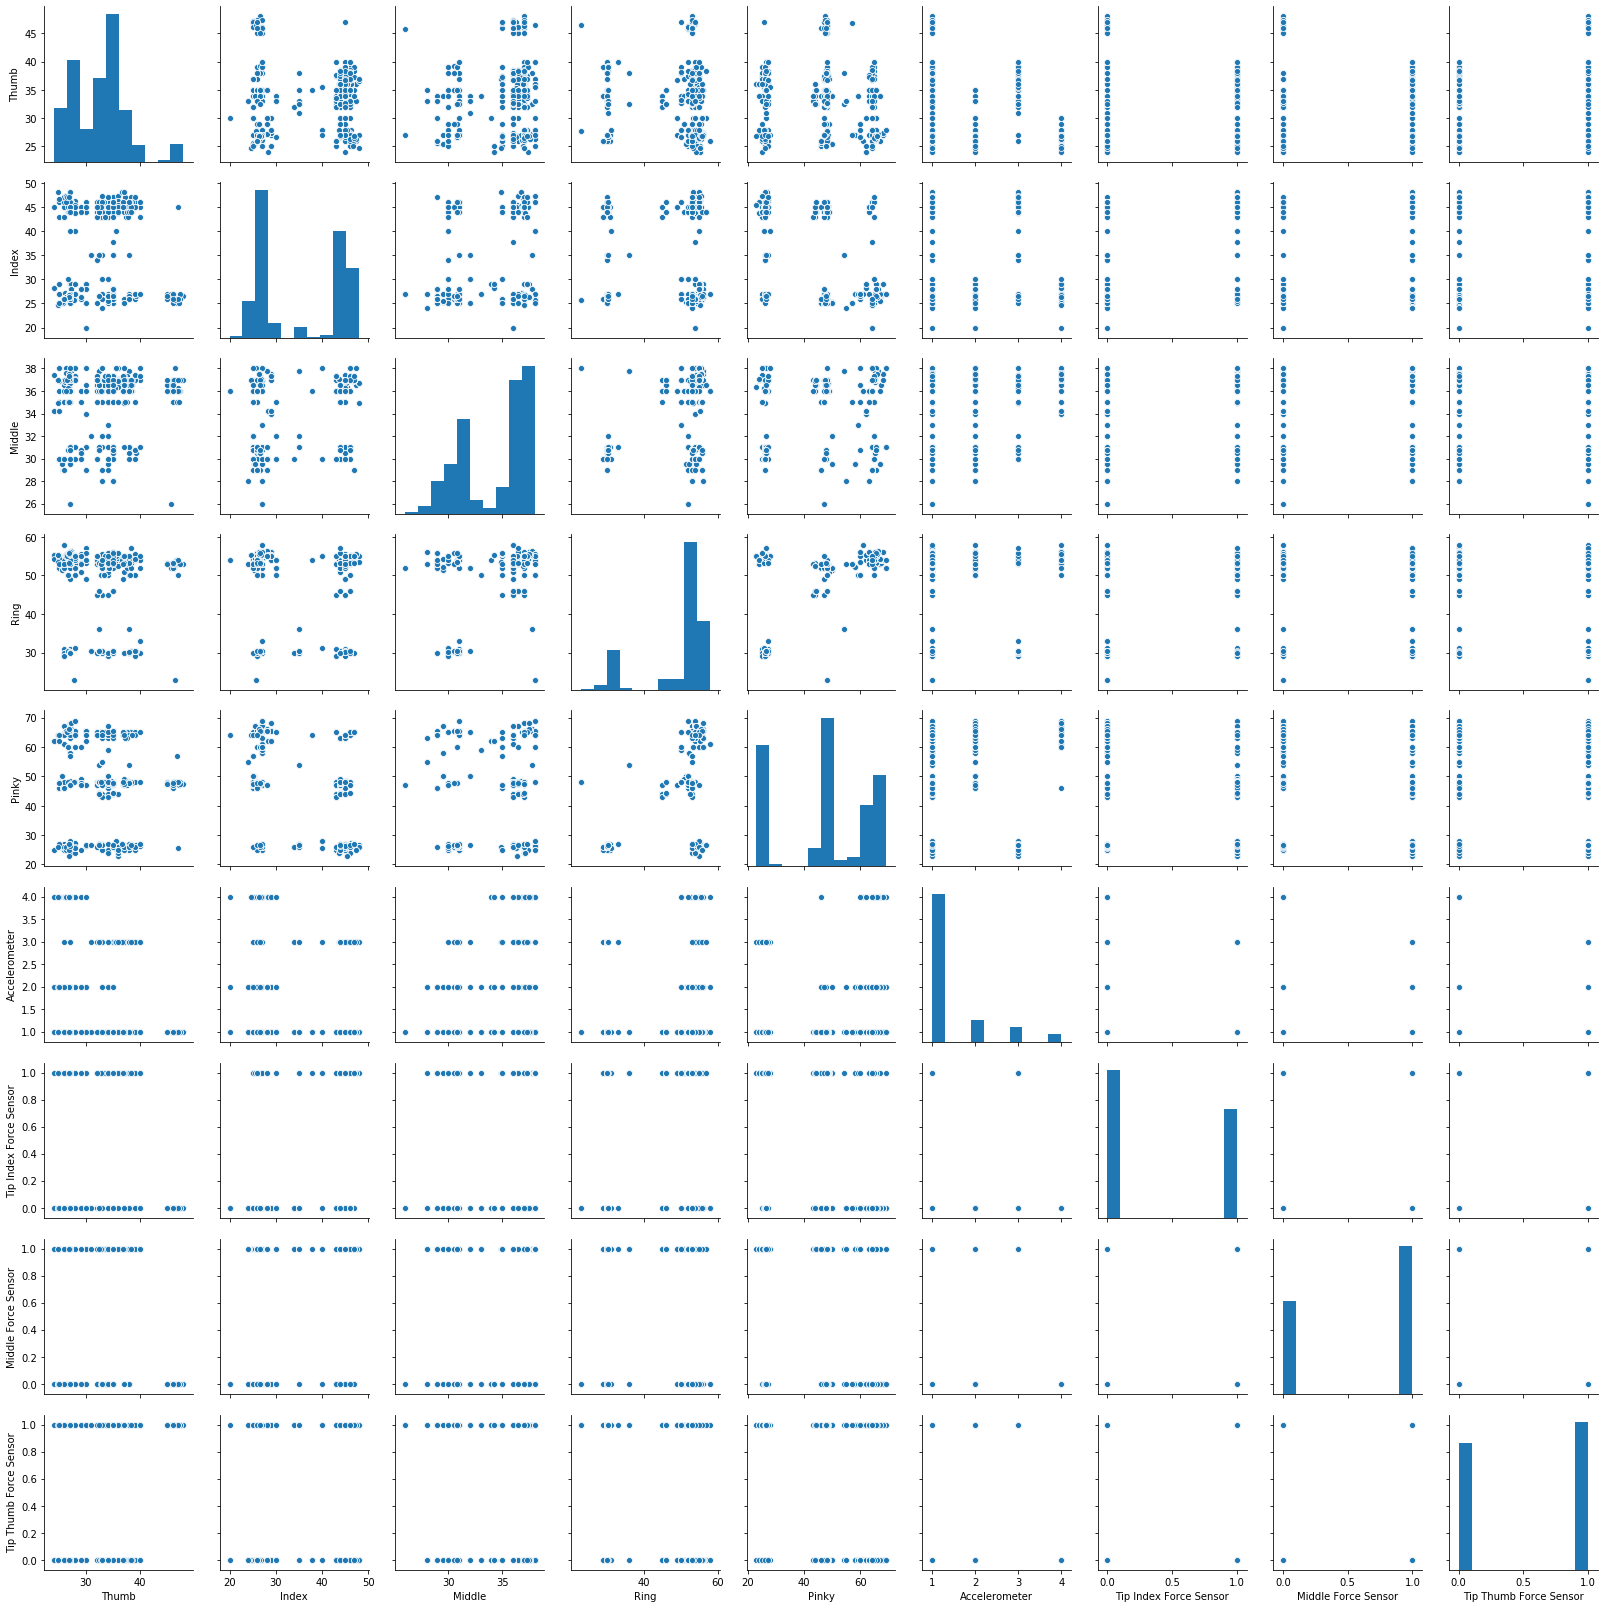

In [21]:
# Visualizing the data to see the correlations
sns.pairplot(df)

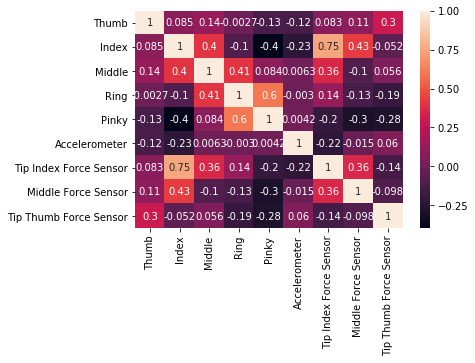

In [22]:
# More data visualization
sns.heatmap(df.corr(), annot=True)

In [23]:
test = df['Letter']
train = df.drop(['Letter'], axis = 1)

In [24]:
# LOAD LIBRARIES
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Split training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.40, random_state=42)

In [25]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8397435897435898


In [26]:
print(y_pred)

['Y' 'Q' 'Y' 'V' 'K' 'Z' 'Z' 'I' 'L' 'L' 'F' 'U' 'T' 'N' 'O' 'Hello' 'K'
 'Q' 'W' 'G' 'P' 'L' 'A' 'W' 'Y' 'U' 'Z' 'B' 'P' 'O' 'X' 'J' 'I' 'G' 'V'
 'L' 'B' 'T' 'V' 'H' 'C' 'X' 'P' 'Z' 'I' 'W' 'O' 'Q' 'Hello' 'M' 'C' 'C'
 'Y' 'C' 'X' 'Y' 'M' 'U' 'F' 'M' 'A' 'F' 'I' 'I' 'G' 'I' 'A' 'Hello' 'M'
 'O' 'O' 'Y' 'F' 'Y' 'M' 'S' 'B' 'P' 'V' 'G' 'C' 'Z' 'X' 'K' 'H' 'H' 'V'
 'S' 'H' 'K' 'R' 'N' 'H' 'L' 'Z' 'H' 'A' 'S' 'F' 'Z' 'Y' 'M' 'N' 'A' 'A'
 'U' 'Z' 'O' 'N' 'Q' 'C' 'P' 'N' 'J' 'Z' 'Hello' 'J' 'R' 'V' 'L' 'J'
 'Hello' 'G' 'M' 'V' 'N' 'P' 'B' 'H' 'B' 'Hello' 'Q' 'S' 'I' 'G' 'Y' 'R'
 'C' 'H' 'C' 'O' 'G' 'V' 'Hello' 'B' 'Y' 'V' 'F' 'G' 'I' 'R' 'O' 'B' 'N'
 'W' 'N' 'U' 'P' 'Z' 'S' 'Z' 'K' 'X' 'Z' 'X' 'O' 'O' 'X' 'J' 'Z' 'Q' 'N'
 'H' 'J' 'P' 'I' 'Hello' 'J' 'O' 'N' 'Q' 'L' 'C' 'S' 'H' 'B' 'N' 'N' 'A'
 'A' 'Z' 'T' 'G' 'F' 'U' 'J' 'C' 'I' 'M' 'L' 'Hello' 'Z' 'H' 'J' 'H' 'L'
 'R' 'H' 'S' 'O' 'W' 'I' 'N' 'Q' 'Y' 'P' 'A' 'C' 'U' 'S' 'C' 'Q' 'Q' 'G'
 'F' 'R' 'F' 'G' 'N' 'F' 'K' 'F' 'J' 'Z' 'Z' 'M' 'Z' 'X

In [27]:
import pickle
s = pickle.dumps(svc)
svc2 = pickle.loads(s)
svc2.predict(X_test)

array(['Y', 'Q', 'Y', 'V', 'K', 'Z', 'Z', 'I', 'L', 'L', 'F', 'U', 'T',
       'N', 'O', 'Hello', 'K', 'Q', 'W', 'G', 'P', 'L', 'A', 'W', 'Y',
       'U', 'Z', 'B', 'P', 'O', 'X', 'J', 'I', 'G', 'V', 'L', 'B', 'T',
       'V', 'H', 'C', 'X', 'P', 'Z', 'I', 'W', 'O', 'Q', 'Hello', 'M',
       'C', 'C', 'Y', 'C', 'X', 'Y', 'M', 'U', 'F', 'M', 'A', 'F', 'I',
       'I', 'G', 'I', 'A', 'Hello', 'M', 'O', 'O', 'Y', 'F', 'Y', 'M',
       'S', 'B', 'P', 'V', 'G', 'C', 'Z', 'X', 'K', 'H', 'H', 'V', 'S',
       'H', 'K', 'R', 'N', 'H', 'L', 'Z', 'H', 'A', 'S', 'F', 'Z', 'Y',
       'M', 'N', 'A', 'A', 'U', 'Z', 'O', 'N', 'Q', 'C', 'P', 'N', 'J',
       'Z', 'Hello', 'J', 'R', 'V', 'L', 'J', 'Hello', 'G', 'M', 'V', 'N',
       'P', 'B', 'H', 'B', 'Hello', 'Q', 'S', 'I', 'G', 'Y', 'R', 'C',
       'H', 'C', 'O', 'G', 'V', 'Hello', 'B', 'Y', 'V', 'F', 'G', 'I',
       'R', 'O', 'B', 'N', 'W', 'N', 'U', 'P', 'Z', 'S', 'Z', 'K', 'X',
       'Z', 'X', 'O', 'O', 'X', 'J', 'Z', 'Q', 'N', 'H', 'J', 'P',

In [28]:
from joblib import dump, load
dump(svc, 'filename.joblib') 

['filename.joblib']

In [29]:
# Loads pickle model
svc = load('filename.joblib') 